<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

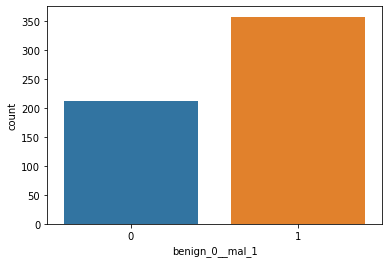

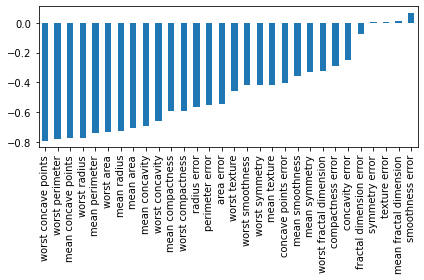

Epoch 1/600
14/14 [==============================] - 1s 26ms/step - loss: 0.6938 - val_loss: 0.6822
Epoch 2/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6805 - val_loss: 0.6637
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6655 - val_loss: 0.6443
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6468 - val_loss: 0.6232
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6380 - val_loss: 0.6009
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6125 - val_loss: 0.5691
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5904 - val_loss: 0.5412
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5673 - val_loss: 0.5083
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5277 - val_loss: 0.4696
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5052 - val_loss: 0.4389
Epoch 1

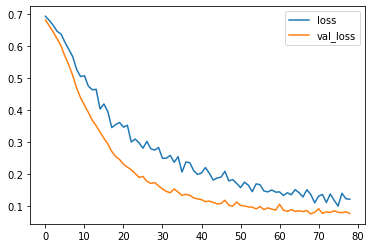

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]


In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',20)
os.chdir("C:\\users\julie\pJupyterProjects\Data Science")


df = pd.read_csv('cancer_classification.csv')
print(df.head)
print(df.info ())    

sns.countplot(data=df,x='benign_0__mal_1')        
plt.show() 

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')      
plt.tight_layout()
plt.show()

X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)         
X_test = scaler.transform(X_test)

model = Sequential()
early_stop = EarlyStopping(monitor='val_loss',mode='mi n',verbose=1,patience=10)
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))         
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

a = pd.DataFrame(model.history.history)
a.plot()
plt.show() 


prediction = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
